In [1]:
import pandas as pd
import numpy as np
import snakecase
import stringcase
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re

In [3]:
categoricals = pd.read_csv('categorical_df.csv')
categoricals.drop(['Unnamed: 0'],axis=1,inplace=True)
effective_to_date = pd.read_csv('effective_to_date.csv')
categoricals = categoricals.assign(effective_to_date=effective_to_date['effective_to_date'])
categoricals

,alpha_customer,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,policy_n,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,BU,79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L,3,1,Agent,Two-Door Car,Medsize,2011-02-24
1,QZ,44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L,3,3,Agent,Four-Door Car,Medsize,2011-01-31
2,AI,49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L,3,1,Agent,Two-Door Car,Medsize,2011-02-19
3,WW,63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L,2,1,Call Center,SUV,Medsize,2011-01-20
4,HB,64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L,1,1,Agent,Four-Door Car,Medsize,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA,72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L,1,2,Web,Four-Door Car,Medsize,2011-02-10
9130,PK,87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L,3,1,Branch,Four-Door Car,Medsize,2011-02-12
9131,TD,14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L,2,1,Branch,Four-Door Car,Medsize,2011-02-06
9132,UP,19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L,2,3,Branch,Four-Door Car,Large,2011-02-03


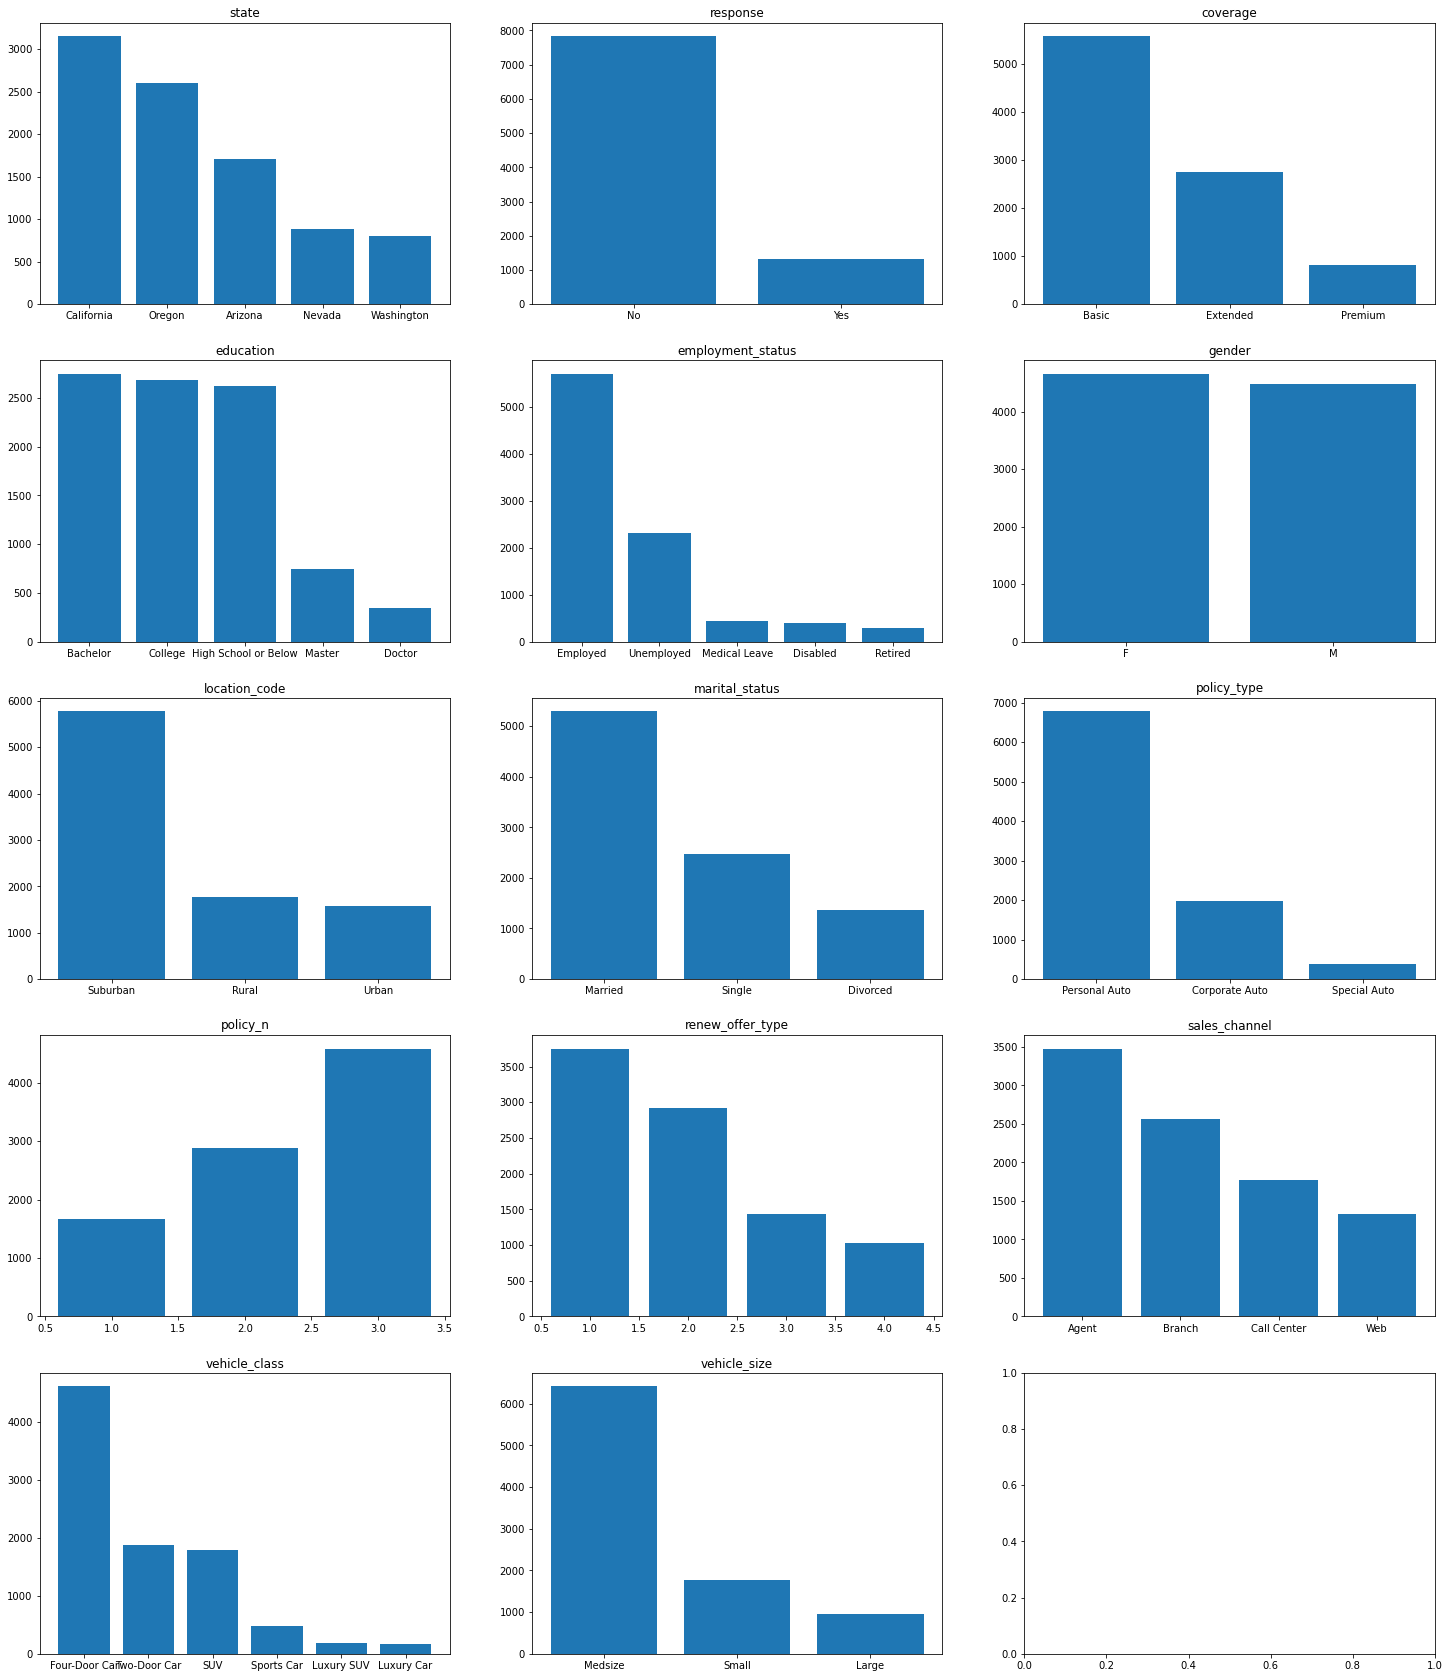

In [6]:
# Create a figure and set of axes
fig, axs = plt.subplots(5, 3, figsize=(25, 30))

# Loop through each of your columns
for i, col in enumerate(categoricals[['state', 'response', 'coverage',
       'education', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy_n', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size']]):
    
    # Select the appropriate axes
    ax = axs[i//3, i%3]
    
    # Count the number of occurrences of each category
    counts = categoricals[col].value_counts()
    
    # Sort the categories by count
    counts = counts.sort_values(ascending=False)
    
    # Create a bar plot
    ax.bar(counts.index, counts.values)
    
    # Add a title
    ax.set_title(col)

# Show the plot
plt.show()

In [4]:
year_pattern = r"\d{4}"
month_pattern = r"-\d{2}-" 
categoricals['year_effective_to_date'] = categoricals['effective_to_date'].map(lambda x: re.findall(year_pattern,str(x))[0] 
                if len(str(x)) > 1 else np.nan )
categoricals['month_effective_to_date'] = categoricals['effective_to_date'].map(lambda x: re.findall(month_pattern,str(x))[0][1:-1] 
                if len(str(x)) > 1 else np.nan )
categoricals

,alpha_customer,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,policy_n,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,year_effective_to_date,month_effective_to_date
0,BU,79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L,3,1,Agent,Two-Door Car,Medsize,2011-02-24,2011,02
1,QZ,44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L,3,3,Agent,Four-Door Car,Medsize,2011-01-31,2011,01
2,AI,49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L,3,1,Agent,Two-Door Car,Medsize,2011-02-19,2011,02
3,WW,63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L,2,1,Call Center,SUV,Medsize,2011-01-20,2011,01
4,HB,64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L,1,1,Agent,Four-Door Car,Medsize,2011-02-03,2011,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA,72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L,1,2,Web,Four-Door Car,Medsize,2011-02-10,2011,02
9130,PK,87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L,3,1,Branch,Four-Door Car,Medsize,2011-02-12,2011,02
9131,TD,14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L,2,1,Branch,Four-Door Car,Medsize,2011-02-06,2011,02
9132,UP,19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L,2,3,Branch,Four-Door Car,Large,2011-02-03,2011,02
